In [1]:
import os

def print_file_contents_in_folder(folder_path):
    # Check if the folder path exists
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return
    
    # List all files in the folder
    files = os.listdir(folder_path)
    
    if not files:
        print(f"No files found in '{folder_path}'.")
    else:
        print(f"Files in '{folder_path}':")
        files_read = 0  # Track the number of files successfully read
        
        for file_name in files:
            file_path = os.path.join(folder_path, file_name)
            if os.path.isfile(file_path):
                try:
                    with open(file_path, 'r') as file:
                        contents = file.read()
                        print(f"Contents of '{file_name}':")
                        print(contents)
                        files_read += 1
                except Exception as e:
                    print(f"Error reading '{file_name}': {e}")
            else:
                print(f"'{file_name}' is not a file.")
        
        # Print summary of files read
        print(f"Total files read: {files_read}")

# Specify the folder path
folder_path = 'Text Files/'

# Call the function to print file contents in the folder
print_file_contents_in_folder(folder_path)


Files in 'Text Files/':
Contents of 'waveform_303371215_085609_only.txt':
Point           303835.3600 6558110.7690 39.1790
Scanner         303818.4102 6557997.7177 439.9158
Intensity       301
Time            303371215.085609
Channel 1 count 960
Sample length   0.05996
Point           15.95346
Vector x        3.851568E-011
Vector y        1.939066E-010
Vector z        -1.035381E-004
Channel 1 samples
517
666
775
773
663
523
422
368
341
330
316
283
244
215
201
207
217
215
235
304
372
384
372
393
457
532
579
584
591
660
765
801
724
600
509
483
480
428
334
273
248
195
144
175
260
324
374
425
421
362
332
347
349
345
379
415
396
348
324
314
295
303
381
497
569
559
498
445
446
504
565
571
544
557
604
591
480
368
359
448
530
528
463
407
391
384
359
333
345
395
444
490
569
641
611
476
351
308
320
353
392
391
329
276
299
356
367
325
279
284
354
436
459
425
386
366
339
292
250
231
231
233
231
233
244
265
288
314
350
364
314
249
260
335
388
413
446
456
408
351
331
329
323
332
351
341
298
259
255


In [2]:
import os
import re

def process_files_in_folder(folder_path):
    # Check if the folder path exists
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return
    
    # List all files in the folder
    files = os.listdir(folder_path)
    
    if not files:
        print(f"No files found in '{folder_path}'.")
        return
    
    print(f"Processing files in '{folder_path}':")
    
    returning_points = []  # List to store returning points for every 10 files
    x_cor = []  # List to store x coordinates
    y_cor = []  # List to store y coordinates
    z_cor = []  # List to store z coordinates
    file_count = 0
    
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        if os.path.isfile(file_path):
            # Initialize variables to store extracted values
            sample_length = None
            point = None
            
            # Define a regular expression pattern to match floating-point numbers
            pattern = r"[-+]?\d*\.\d+|\d+"
            
            try:
                with open(file_path, 'r') as file:
                    file_contents = file.readlines()
                    
                    # Extract the Point (x, y, z) coordinates from the first line
                    point_match = re.findall(pattern, file_contents[0])
                    if len(point_match) >= 3:
                        x = float(point_match[0])
                        y = float(point_match[1])
                        z = float(point_match[2])
                        
                        # Store coordinates in separate lists
                        x_cor.append(x)
                        y_cor.append(y)
                        z_cor.append(z)
                    
                    # Check if the file has at least 7 lines
                    if len(file_contents) >= 7:
                        # Extract numeric values from lines 6 and 7 using regular expressions
                        sample_length_match = re.findall(pattern, file_contents[5])
                        point_match = re.findall(pattern, file_contents[6])
                        
                        # Convert the matched values to floats
                        if sample_length_match:
                            sample_length = float(sample_length_match[0])
                        if point_match:
                            point = float(point_match[0])
                            
                        # Calculate Returning Point
                        if sample_length is not None and point is not None:
                            returning_point = point / sample_length
                            print(f"File: {file_name}")
                            print("Sample Length:", sample_length)
                            print("Point:", point)
                            print("Returning Point:", returning_point)
                            
                            # Store returning point in the list
                            returning_points.append(returning_point)
                            
                            file_count += 1
                            
                            # Check if we have processed 10 files
                            if file_count % 10 == 0:
                                print(f"Returning Points after {file_count} files:", returning_points)
                                print(f"x Coordinates after {file_count} files:", x_cor)
                                print(f"y Coordinates after {file_count} files:", y_cor)
                                print(f"z Coordinates after {file_count} files:", z_cor)
            
            except Exception as e:
                print(f"Error processing '{file_name}': {e}")
        else:
            print(f"'{file_name}' is not a file.")
    
    # Print final returning points and coordinates after processing all files
    print(f"Final Returning Points after processing {file_count} files:", returning_points)
    print(f"Final x Coordinates after processing {file_count} files:", x_cor)
    print(f"Final y Coordinates after processing {file_count} files:", y_cor)
    print(f"Final z Coordinates after processing {file_count} files:", z_cor)

# Call the function to process files in the folder
process_files_in_folder(folder_path)


Processing files in 'Text Files/':
File: waveform_303371215_085609_only.txt
Sample Length: 0.05996
Point: 15.95346
Returning Point: 266.0683789192795
Final Returning Points after processing 1 files: [266.0683789192795]
Final x Coordinates after processing 1 files: [303835.36]
Final y Coordinates after processing 1 files: [6558110.769]
Final z Coordinates after processing 1 files: [39.179]


In [3]:
#pip install tabulate

In [4]:
import os
import re
from tabulate import tabulate

def process_files_in_folder(folder_path):
    # Check if the folder path exists
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return
    
    # List all files in the folder
    files = os.listdir(folder_path)
    
    if not files:
        print(f"No files found in '{folder_path}'.")
        return
    
    print(f"Processing files in '{folder_path}':")
    
    returning_points = []  # List to store returning points for every 10 files
    file_data = []  # List to store data for table
    
    file_count = 0
    
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        if os.path.isfile(file_path):
            # Initialize variables to store extracted values
            sample_length = None
            point = None
            
            # Define a regular expression pattern to match floating-point numbers
            pattern = r"[-+]?\d*\.\d+|\d+"
            
            try:
                with open(file_path, 'r') as file:
                    file_contents = file.readlines()
                    
                    # Check if the file has at least 7 lines
                    if len(file_contents) >= 7:
                        # Extract numeric values from lines 6 and 7 using regular expressions
                        sample_length_match = re.findall(pattern, file_contents[5])
                        point_match = re.findall(pattern, file_contents[6])
                        
                        # Convert the matched values to floats
                        if sample_length_match:
                            sample_length = float(sample_length_match[0])
                        if point_match:
                            point = float(point_match[0])
                            
                        # Calculate Returning Point
                        if sample_length is not None and point is not None:
                            returning_point = point / sample_length
                            
                            # Store data for table
                            file_data.append([file_name, sample_length, point, returning_point])
                            
                            file_count += 1
                            
                            # Check if we have processed 10 files
                            if file_count % 10 == 0:
                                print(f"Returning Points after {file_count} files:", returning_points)
            
            except Exception as e:
                print(f"Error processing '{file_name}': {e}")
        else:
            print(f"'{file_name}' is not a file.")
    
    # Print final returning points after processing all files
    print(f"Final Returning Points after processing {file_count} files:", returning_points)
    
    # Display data in a table
    headers = ["File Name", "Sample Length", "Point", "Returning Point"]
    print(tabulate(file_data, headers=headers, tablefmt="grid"))



# Call the function to process files in the folder
process_files_in_folder(folder_path)


Processing files in 'Text Files/':
Final Returning Points after processing 1 files: []
+------------------------------------+-----------------+---------+-------------------+
| File Name                          |   Sample Length |   Point |   Returning Point |
+====================================+=================+=========+===================+
| waveform_303371215_085609_only.txt |         0.05996 | 15.9535 |           266.068 |
+------------------------------------+-----------------+---------+-------------------+


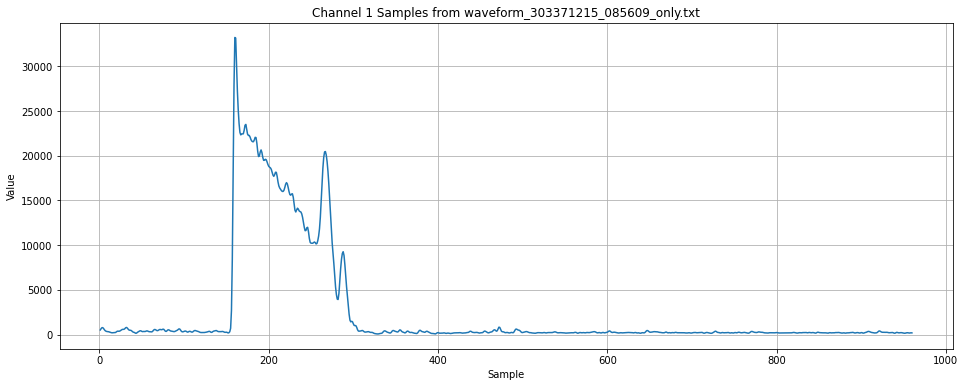

In [5]:
import matplotlib.pyplot as plt
import re
def read_file_contents(folder_path):
    file_contents_dict = {}
    
    # List all files in the specified folder
    files = os.listdir(folder_path)
    
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        if os.path.isfile(file_path):
            try:
                with open(file_path, 'r') as file:
                    # Read all lines from the file
                    file_contents = file.readlines()
                    
                    # Store file contents in the dictionary
                    file_contents_dict[file_name] = file_contents
                    
            except Exception as e:
                print(f"Error reading file '{file_name}': {e}")
    
    return file_contents_dict

def plot_channel_1_samples(file_contents_dict):
    for file_name, file_contents in file_contents_dict.items():
        channel_1_samples = []  # List to store Channel 1 samples for plotting
        
        # Define a regular expression pattern to match integer values
        pattern = r"\d+"
        
        found_channel_1_samples = False
        for line in file_contents:
            line = str(line).strip()  # Ensure line is converted to string and stripped
            
            if found_channel_1_samples and line:
                # Extract and convert numeric values from lines after 'Channel 1 samples'
                sample_matches = re.findall(pattern, line)
                for sample in sample_matches:
                    channel_1_samples.append(int(sample))
                
            if line == 'Channel 1 samples':
                found_channel_1_samples = True
        
        # Plot Channel 1 samples
        if channel_1_samples:
            plt.figure(figsize=(16, 6))
            plt.plot(range(1, len(channel_1_samples) + 1), channel_1_samples)
            plt.xlabel('Sample')
            plt.ylabel('Value')
            plt.title(f'Channel 1 Samples from {file_name}')
            plt.grid(True)
            plt.show()


# Read file contents from the specified folder
file_contents_dict = read_file_contents(folder_path)

# Call the function to plot Channel 1 samples for each file
plot_channel_1_samples(file_contents_dict)


In [6]:
import os

def read_values_from_files(folder_path):
    file_value_arrays = {}  # Dictionary to store arrays of values for each file
    
    # List all files in the specified folder
    files = os.listdir(folder_path)
    
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        if os.path.isfile(file_path):
            # Initialize an empty array to store the lines (values) from the file
            values_array = []
            
            try:
                # Open the file in read mode
                with open(file_path, 'r') as file:
                    # Skip the first 11 lines
                    for _ in range(11):
                        next(file)
                    
                    # Read the rest of the lines (values) and store them in the array
                    for line in file:
                        values_array.append(line.strip())
                
                # Store the values array in the dictionary with file name as the key
                file_value_arrays[file_name] = values_array
            
            except Exception as e:
                print(f"Error reading file '{file_name}': {e}")
        
    return file_value_arrays


# Read values from files in the specified folder
file_value_arrays = read_values_from_files(folder_path)

# Print the arrays with file name as array name and number of values stored
for file_name, values_array in file_value_arrays.items():
    array_name = file_name.replace('.txt', '_array')  # Generate array name from file name
    num_values = len(values_array)  # Get the number of values in the array
    print(f"{array_name}: {values_array} (Number of values: {num_values})")


waveform_303371215_085609_only_array: ['517', '666', '775', '773', '663', '523', '422', '368', '341', '330', '316', '283', '244', '215', '201', '207', '217', '215', '235', '304', '372', '384', '372', '393', '457', '532', '579', '584', '591', '660', '765', '801', '724', '600', '509', '483', '480', '428', '334', '273', '248', '195', '144', '175', '260', '324', '374', '425', '421', '362', '332', '347', '349', '345', '379', '415', '396', '348', '324', '314', '295', '303', '381', '497', '569', '559', '498', '445', '446', '504', '565', '571', '544', '557', '604', '591', '480', '368', '359', '448', '530', '528', '463', '407', '391', '384', '359', '333', '345', '395', '444', '490', '569', '641', '611', '476', '351', '308', '320', '353', '392', '391', '329', '276', '299', '356', '367', '325', '279', '284', '354', '436', '459', '425', '386', '366', '339', '292', '250', '231', '231', '233', '231', '233', '244', '265', '288', '314', '350', '364', '314', '249', '260', '335', '388', '413', '446', '4

In [7]:
import os

def read_values_from_files(folder_path):
    file_value_arrays = {}  # Dictionary to store arrays of values for each file
    
    # List all files in the specified folder
    files = os.listdir(folder_path)
    
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        if os.path.isfile(file_path):
            # Initialize an empty array to store the lines (values) from the file
            values_array = []
            
            try:
                # Open the file in read mode
                with open(file_path, 'r') as file:
                    # Skip the first 11 lines
                    for _ in range(11):
                        next(file)
                    
                    # Read the rest of the lines (values) and store them in the array
                    for line in file:
                        values_array.append(line.strip())
                
                # Store the values array in the dictionary with file name as the key
                file_value_arrays[file_name] = values_array
            
            except Exception as e:
                print(f"Error reading file '{file_name}': {e}")
        
    return file_value_arrays

def clean_values(file_value_arrays):
    cleaned_value_arrays = {}  # Dictionary to store cleaned arrays of values
    
    for file_name, values_array in file_value_arrays.items():
        # Extract values from index 101 to 400 (inclusive) to clean the data
        cleaned_values = values_array[100:400] #changed to 600 from 400
        
        # Store the cleaned values array in the dictionary with file name as the key
        cleaned_value_arrays[file_name] = cleaned_values
    
    return cleaned_value_arrays



# Read values from files in the specified folder
file_value_arrays = read_values_from_files(folder_path)

# Clean the values arrays by extracting values from index 101 to 400
cleaned_value_arrays = clean_values(file_value_arrays)

# Print the cleaned arrays with file name as array name and number of values stored
for file_name, cleaned_values in cleaned_value_arrays.items():
    array_name = file_name.replace('.txt', '_cleaned_array')  # Generate array name from file name
    num_values = len(cleaned_values)  # Get the number of cleaned values
    print(f"{array_name}: {cleaned_values} \n( Number of values: {num_values})")


waveform_303371215_085609_only_cleaned_array: ['392', '391', '329', '276', '299', '356', '367', '325', '279', '284', '354', '436', '459', '425', '386', '366', '339', '292', '250', '231', '231', '233', '231', '233', '244', '265', '288', '314', '350', '364', '314', '249', '260', '335', '388', '413', '446', '456', '408', '351', '331', '329', '323', '332', '351', '341', '298', '259', '255', '268', '240', '183', '211', '324', '702', '2697', '8440', '18030', '27813', '33234', '33169', '30214', '27245', '25137', '23599', '22614', '22336', '22441', '22452', '22457', '22840', '23410', '23507', '22982', '22427', '22274', '22276', '22094', '21818', '21651', '21575', '21577', '21774', '22066', '22034', '21415', '20504', '19913', '19980', '20428', '20655', '20360', '19821', '19491', '19497', '19606', '19565', '19334', '19042', '18828', '18724', '18653', '18493', '18190', '17847', '17699', '17874', '18159', '18147', '17691', '17071', '16625', '16398', '16246', '16110', '16018', '16008', '16136', '16

In [8]:
def read_values_from_files(folder_path):
    file_value_arrays = {}  # Dictionary to store arrays of values for each file
    
    # List all files in the specified folder
    files = os.listdir(folder_path)
    
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        
        if os.path.isfile(file_path):
            # Initialize an empty array to store the lines (values) from the file
            values_array = []
            
            try:
                # Open the file in read mode
                with open(file_path, 'r') as file:
                    # Skip the first 11 lines
                    for _ in range(11):
                        next(file)
                    
                    # Read the rest of the lines (values) and store them in the array
                    for line in file:
                        values_array.append(line.strip())
                
                # Store the values array in the dictionary with file name as the key
                file_value_arrays[file_name] = values_array
            
            except Exception as e:
                print(f"Error reading file '{file_name}': {e}")
        
    return file_value_arrays

def clean_and_generate_table(file_value_arrays):
    table_data = {}  # Dictionary to store table data for each file
    
    for file_name, values_array in file_value_arrays.items():
        # Extract values from index 101 to 400 (inclusive) to clean the data
        cleaned_values = values_array[100:400] ####
        
        # Create table rows for the file
        table_rows = []
        class_label = 0  # Initial class label
        
        for i, value in enumerate(cleaned_values, start=101):
            # Create a row for the table with sample number, value, and class label
            table_rows.append([i, value, class_label])
        
        # Store table rows in the dictionary with file name as the key
        table_data[file_name] = table_rows
    
    return table_data

def print_table(table_data):
    # Print the table for each file
    for file_name, table_rows in table_data.items():
        print(f"Table for {file_name}:")
        print("Sample_no\tSamples\tClass_Label")
        for row in table_rows:
            print("\t".join(map(str, row)))
        print()  # Print a blank line for separation



# Read values from files in the specified folder
file_value_arrays = read_values_from_files(folder_path)

# Clean values and generate table data for each file
table_data = clean_and_generate_table(file_value_arrays)

# Print tables for each file
print_table(table_data)


Table for waveform_303371215_085609_only.txt:
Sample_no	Samples	Class_Label
101	392	0
102	391	0
103	329	0
104	276	0
105	299	0
106	356	0
107	367	0
108	325	0
109	279	0
110	284	0
111	354	0
112	436	0
113	459	0
114	425	0
115	386	0
116	366	0
117	339	0
118	292	0
119	250	0
120	231	0
121	231	0
122	233	0
123	231	0
124	233	0
125	244	0
126	265	0
127	288	0
128	314	0
129	350	0
130	364	0
131	314	0
132	249	0
133	260	0
134	335	0
135	388	0
136	413	0
137	446	0
138	456	0
139	408	0
140	351	0
141	331	0
142	329	0
143	323	0
144	332	0
145	351	0
146	341	0
147	298	0
148	259	0
149	255	0
150	268	0
151	240	0
152	183	0
153	211	0
154	324	0
155	702	0
156	2697	0
157	8440	0
158	18030	0
159	27813	0
160	33234	0
161	33169	0
162	30214	0
163	27245	0
164	25137	0
165	23599	0
166	22614	0
167	22336	0
168	22441	0
169	22452	0
170	22457	0
171	22840	0
172	23410	0
173	23507	0
174	22982	0
175	22427	0
176	22274	0
177	22276	0
178	22094	0
179	21818	0
180	21651	0
181	21575	0
182	21577	0
183	21774	0
184	22066	0
185	22034	0
186	21415	0
187	

In [9]:
def check_table_data_types(table_data):
    # Iterate over each file's table data
    for file_name, table_rows in table_data.items():
        print(f"Table for {file_name}:")
        print("Sample_no\tSamples\tClass_Label")
        
        # Print each row of the table and check data types
        for row in table_rows:
            sample_no, samples, class_label = row
            # Print the row
           # print(f"{sample_no}\t{samples}\t{class_label}")
            
            # Check data types of elements in the row
            print("Data Types:")
            print(f"Sample_no: {type(sample_no)}")
            print(f"Samples: {type(samples)}")
            print(f"Class_Label: {type(class_label)}")
            
        print()  
# Call the function to check data types of elements in each table
check_table_data_types(table_data)


Table for waveform_303371215_085609_only.txt:
Sample_no	Samples	Class_Label
Data Types:
Sample_no: <class 'int'>
Samples: <class 'str'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'str'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'str'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'str'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'str'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'str'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'str'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'str'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'str'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'str'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class '

In [10]:
def convert_table_to_integers(table_data):
    # Iterate over each file's table data
    for file_name, table_rows in table_data.items():
        print(f"Table for {file_name}:")
        print("Sample_no\tSamples\tClass_Label")
        
        # Convert each element in the table_rows list to integer data type
        for row in table_rows:
            row[0] = int(row[0])  # Convert Sample_no to int
            row[1] = int(row[1])  # Convert Samples to int
            row[2] = int(row[2])  # Convert Class_Label to int
            
            # Print the updated row with integer data types
            print(f"{row[0]}\t{row[1]}\t{row[2]}")
        
        print()  # Print a blank line for separation


# Call the function to convert table elements to integers and print updated tables
convert_table_to_integers(table_data)


Table for waveform_303371215_085609_only.txt:
Sample_no	Samples	Class_Label
101	392	0
102	391	0
103	329	0
104	276	0
105	299	0
106	356	0
107	367	0
108	325	0
109	279	0
110	284	0
111	354	0
112	436	0
113	459	0
114	425	0
115	386	0
116	366	0
117	339	0
118	292	0
119	250	0
120	231	0
121	231	0
122	233	0
123	231	0
124	233	0
125	244	0
126	265	0
127	288	0
128	314	0
129	350	0
130	364	0
131	314	0
132	249	0
133	260	0
134	335	0
135	388	0
136	413	0
137	446	0
138	456	0
139	408	0
140	351	0
141	331	0
142	329	0
143	323	0
144	332	0
145	351	0
146	341	0
147	298	0
148	259	0
149	255	0
150	268	0
151	240	0
152	183	0
153	211	0
154	324	0
155	702	0
156	2697	0
157	8440	0
158	18030	0
159	27813	0
160	33234	0
161	33169	0
162	30214	0
163	27245	0
164	25137	0
165	23599	0
166	22614	0
167	22336	0
168	22441	0
169	22452	0
170	22457	0
171	22840	0
172	23410	0
173	23507	0
174	22982	0
175	22427	0
176	22274	0
177	22276	0
178	22094	0
179	21818	0
180	21651	0
181	21575	0
182	21577	0
183	21774	0
184	22066	0
185	22034	0
186	21415	0
187	

In [11]:
def check_table_data_types(table_data):
    # Iterate over each file's table data
    for file_name, table_rows in table_data.items():
        print(f"Table for {file_name}:")
        print("Sample_no\tSamples\tClass_Label")
        
        # Print each row of the table and check data types
        for row in table_rows:
            sample_no, samples, class_label = row
            # Print the row
           # print(f"{sample_no}\t{samples}\t{class_label}")
            
            # Check data types of elements in the row
            print("Data Types:")
            print(f"Sample_no: {type(sample_no)}")
            print(f"Samples: {type(samples)}")
            print(f"Class_Label: {type(class_label)}")
            
        print()  

check_table_data_types(table_data)


Table for waveform_303371215_085609_only.txt:
Sample_no	Samples	Class_Label
Data Types:
Sample_no: <class 'int'>
Samples: <class 'int'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'int'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'int'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'int'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'int'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'int'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'int'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'int'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'int'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class 'int'>
Class_Label: <class 'int'>
Data Types:
Sample_no: <class 'int'>
Samples: <class '

In [12]:
def print_data_types_table(table_data):
    # Iterate over each file's table data
    for file_name, table_rows in table_data.items():
        print(f"Data Types Table for {file_name}:")
        print("Sample_no\tSamples\tClass_Label")
        
        # Iterate over each row in the table and print data types
        for row in table_rows:
            data_types_row = []
            for column_value in row:
                data_types_row.append(type(column_value).__name__)
            
            # Print the row of data types
            print("\t".join(data_types_row))
        
        print()  # Print a blank line after each file's data types table


# Call the function to print data types table for each file
print_data_types_table(table_data)


Data Types Table for waveform_303371215_085609_only.txt:
Sample_no	Samples	Class_Label
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
int	int	int
i

Plotting data for waveform_303371215_085609_only.txt:


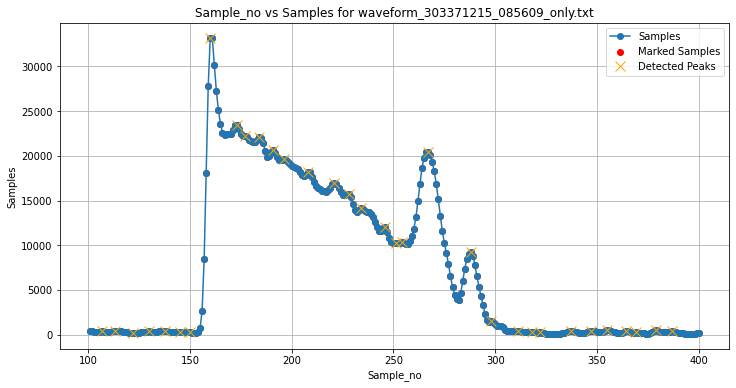

In [13]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def plot_data_with_peaks(table_data):
    # Iterate over each file's table data
    for file_name, table_rows in table_data.items():
        print(f"Plotting data for {file_name}:")
        
        # Extract Sample_no and Samples values from each row
        sample_numbers = [row[0] for row in table_rows]
        samples = [row[1] for row in table_rows]
        
        # Find peaks in the samples
        peaks, _ = find_peaks(samples, height=0)
        
        # Plot Sample_no vs Samples
        plt.figure(figsize=(12, 6))
        plt.plot(sample_numbers, samples, marker='o', linestyle='-', label='Samples')
        
        # Mark samples with dots
        plt.scatter(sample_numbers, samples, color='red', label='Marked Samples')
        
        # Highlight detected peaks
        peak_sample_numbers = [sample_numbers[i] for i in peaks]  # Get sample numbers at peak indices
        peak_samples = [samples[i] for i in peaks]  # Get sample values at peak indices
        plt.plot(peak_sample_numbers, peak_samples, "x", markersize=10, color='orange', label='Detected Peaks')
        
        plt.title(f'Sample_no vs Samples for {file_name}')
        plt.xlabel('Sample_no')
        plt.ylabel('Samples')
        plt.legend()
        plt.grid(True)
        plt.show()

# Call the function to plot data for each file with peaks
plot_data_with_peaks(table_data)

Processing data for waveform_303371215_085609_only.txt:
Detected Peaks Indices: [ 59 166 187]
Detected Peak Values: [33234, 20475, 9269]


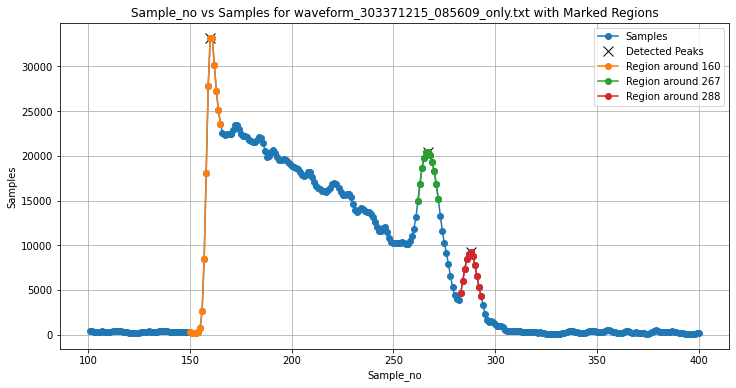

Region 1 - Sample Numbers: [150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165]
Region 1 - Sample Values: [268, 240, 183, 211, 324, 702, 2697, 8440, 18030, 27813, 33234, 33169, 30214, 27245, 25137, 23599]

Region 2 - Sample Numbers: [262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272]
Region 2 - Sample Values: [14905, 16871, 18597, 19813, 20423, 20475, 20086, 19345, 18278, 16886, 15190]

Region 3 - Sample Numbers: [283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293]
Region 3 - Sample Values: [4621, 5951, 7371, 8432, 9071, 9269, 8851, 7812, 6518, 5342, 4314]



In [14]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def plot_data_with_top_peaks_and_regions(table_data):
    precomputed_peaks = {}
    regions_dict = {}

    for file_name, table_rows in table_data.items():
        print(f"Processing data for {file_name}:")

        sample_numbers = [row[0] for row in table_rows]
        samples = [row[1] for row in table_rows]
        
        # Dynamically adjust the prominence 
        dynamic_prominence = max(samples) * 0.1  # 10% of the max sample value
        
        # Find peaks with adjusted parameters
        peaks, _ = find_peaks(samples, height=3000, prominence=dynamic_prominence, distance=1)
        
        # Fallback if no peaks are found
        if len(peaks) == 0:
            prominence_threshold = max(samples) * 0.05
            peaks, _ = find_peaks(samples, height=1000, prominence=prominence_threshold, distance=1)
        
        # Debug prints for detected peaks
        peak_samples = [samples[i] for i in peaks]
        print(f"Detected Peaks Indices: {peaks}")
        print(f"Detected Peak Values: {peak_samples}")
        
        # Store the peaks for the current file
        precomputed_peaks[file_name] = peaks
        
        # Plot Sample_no vs Samples
        plt.figure(figsize=(12, 6))
        plt.plot(sample_numbers, samples, marker='o', linestyle='-', label='Samples')
        
        # Mark all detected peaks
        peak_sample_numbers = [sample_numbers[i] for i in peaks]
        peak_samples = [samples[i] for i in peaks]
        plt.plot(peak_sample_numbers, peak_samples, "x", markersize=10, color='black', label='Detected Peaks')
        
        # List to store marked regions
        marked_regions = []
        
        if len(peaks) > 0:
            # Sort peaks by their sample number
            sorted_peak_indices = np.argsort(peak_sample_numbers)
            sorted_peak_sample_numbers = [peak_sample_numbers[i] for i in sorted_peak_indices]
            sorted_peak_samples = [peak_samples[i] for i in sorted_peak_indices]
            
            # Determine the number of peaks
            num_peaks = len(sorted_peak_sample_numbers)
            
            # Mark regions around each of the peaks
            for idx, peak_sample_no in enumerate(sorted_peak_sample_numbers):
                peak_index = sample_numbers.index(peak_sample_no)
                
                # Define the range of indices for the region
                if idx == 0:  # For the peak with the smallest sample number
                    start_index = max(peak_index - 10, 0)
                    end_index = min(peak_index + 6, len(sample_numbers))
                else:  # For all other peaks
                    start_index = max(peak_index - 5, 0)
                    end_index = min(peak_index + 6, len(sample_numbers))
                
                # Extract sample numbers and values for the region
                region_sample_no = sample_numbers[start_index:end_index]
                region_values = samples[start_index:end_index]
                
                # Append sample numbers and values to marked regions list
                marked_regions.append((region_sample_no, region_values))
                
                # Plot the region
                plt.plot(region_sample_no, region_values, marker='o', linestyle='-', label=f'Region around {peak_sample_no}')
        
        plt.title(f'Sample_no vs Samples for {file_name} with Marked Regions')
        plt.xlabel('Sample_no')
        plt.ylabel('Samples')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Sort the marked regions based on sample numbers (ascending order)
        marked_regions.sort(key=lambda x: x[0][0])
        regions_dict[file_name] = marked_regions
        
        # Print the sorted sample numbers and values of the marked regions
        for idx, (region_sample_no, region_values) in enumerate(marked_regions, start=1):
            print(f"Region {idx} - Sample Numbers:", region_sample_no)
            print(f"Region {idx} - Sample Values:", region_values)
            print()

    return precomputed_peaks, regions_dict

# Call the function to plot data for each file with top peaks and marked regions
precomputed_peaks, regions_dict = plot_data_with_top_peaks_and_regions(table_data)


In [15]:
import numpy as np

def extract_sample_numbers_and_regions(table_data, precomputed_peaks):
    # Dictionary to store sample numbers and regions for each file
    sample_numbers_and_regions = {}

    # Iterate over each file's table data
    for file_name, table_rows in table_data.items():
        print(f"Processing data for {file_name}:")

        # Extract Sample_no and Samples values from each row
        sample_numbers = [row[0] for row in table_rows]
        samples = [row[1] for row in table_rows]

        # Retrieve precomputed peaks for the current file
        if file_name not in precomputed_peaks:
            print(f"No precomputed peaks found for {file_name}")
            continue

        peaks = precomputed_peaks[file_name]

        # List to store regions for the current file
        regions = []

        # Get peak sample numbers and sort by sample number
        peak_sample_numbers = [sample_numbers[peak] for peak in peaks]
        sorted_peak_indices = np.argsort(peak_sample_numbers)
        sorted_peak_sample_numbers = [peak_sample_numbers[i] for i in sorted_peak_indices]
        sorted_peaks = [peaks[i] for i in sorted_peak_indices]

        # Mark regions around each peak
        for idx, peak_index in enumerate(sorted_peaks):
            # Get the sample number corresponding to the peak index
            peak_sample_no = sample_numbers[peak_index]
            
            # Define the range of indices for the region
            if idx == 0:  # For the peak with the smallest sample number
                start_index = max(peak_index - 10, 0)
                end_index = min(peak_index + 6, len(sample_numbers))
            else:  # For all other peaks
                start_index = max(peak_index - 5, 0)
                end_index = min(peak_index + 6, len(sample_numbers))
            
            # Extract sample numbers and values for the region
            region_sample_no = sample_numbers[start_index:end_index]
            region_values = samples[start_index:end_index]
            
            # Append the region to the list of regions
            regions.append((region_sample_no, region_values))
        
        # Store the sample numbers and regions for the current file
        sample_numbers_and_regions[file_name] = {
            'sample_numbers': sample_numbers,
            'regions': regions
        }

    return sample_numbers_and_regions

# Call the function to extract sample numbers and regions for each file
sample_numbers_and_regions = extract_sample_numbers_and_regions(table_data, precomputed_peaks)

# Access and print the sample numbers and regions for each file
for file_name, data in sample_numbers_and_regions.items():
    print(f"File: {file_name}")
    
    # Print the extracted regions
    print("Regions:")
    for idx, (region_sample_no, region_values) in enumerate(data['regions'], start=1):
        print(f"Region {idx} - Sample Numbers:")
        print(region_sample_no)
        print(f"Region {idx} - Sample Values:")
        print(region_values)
    
    print()  # Add a blank line for separation


Processing data for waveform_303371215_085609_only.txt:
File: waveform_303371215_085609_only.txt
Regions:
Region 1 - Sample Numbers:
[150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165]
Region 1 - Sample Values:
[268, 240, 183, 211, 324, 702, 2697, 8440, 18030, 27813, 33234, 33169, 30214, 27245, 25137, 23599]
Region 2 - Sample Numbers:
[262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272]
Region 2 - Sample Values:
[14905, 16871, 18597, 19813, 20423, 20475, 20086, 19345, 18278, 16886, 15190]
Region 3 - Sample Numbers:
[283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293]
Region 3 - Sample Values:
[4621, 5951, 7371, 8432, 9071, 9269, 8851, 7812, 6518, 5342, 4314]



In [16]:
def update_class_labels(table_data, sample_numbers_and_regions):
    # Iterate over each file's data
    for file_name, data in sample_numbers_and_regions.items():
        regions = data['regions']
        num_regions = len(regions)
        
        # Update class labels based on the number of regions
        if num_regions == 3:
            class_labels = [1, 3, 4]
        elif num_regions == 2:
            class_labels = [1, 4]
        elif num_regions == 4:
            class_labels = [1, 3, 3, 4]
        else:
            print(f"Unsupported number of regions ({num_regions}) for {file_name}")
            continue
        
        # Iterate over rows in table_data and update class labels
        for row in table_data[file_name]:
            sample_no = row[0]  # Extract sample number from the row
            
            # Find the region containing this sample number
            for region_idx, (region_sample_no, _) in enumerate(regions):
                if sample_no in region_sample_no:
                    # Update the class label in the row 
                    if len(row) < 3:  # Check if the class label column exists
                        row.append(class_labels[region_idx])  # Add a new class label column if it doesn't exist
                    else:
                        row[2] = class_labels[region_idx]  # Update the class label in the existing column
                    break  # Stop searching once the region is found


# Call the function to update the class labels in table_data
update_class_labels(table_data, sample_numbers_and_regions)

# Print the entire updated table_data with all columns
for file_name, table_rows in table_data.items():
    print(f"File: {file_name}")
    print("Sample_no\tSamples\tClass_Label")
    for row in table_rows:
        print("\t".join(map(str, row)))  # Print each row with tab-separated columns
    print()  # Print a blank line after each file's data


File: waveform_303371215_085609_only.txt
Sample_no	Samples	Class_Label
101	392	0
102	391	0
103	329	0
104	276	0
105	299	0
106	356	0
107	367	0
108	325	0
109	279	0
110	284	0
111	354	0
112	436	0
113	459	0
114	425	0
115	386	0
116	366	0
117	339	0
118	292	0
119	250	0
120	231	0
121	231	0
122	233	0
123	231	0
124	233	0
125	244	0
126	265	0
127	288	0
128	314	0
129	350	0
130	364	0
131	314	0
132	249	0
133	260	0
134	335	0
135	388	0
136	413	0
137	446	0
138	456	0
139	408	0
140	351	0
141	331	0
142	329	0
143	323	0
144	332	0
145	351	0
146	341	0
147	298	0
148	259	0
149	255	0
150	268	1
151	240	1
152	183	1
153	211	1
154	324	1
155	702	1
156	2697	1
157	8440	1
158	18030	1
159	27813	1
160	33234	1
161	33169	1
162	30214	1
163	27245	1
164	25137	1
165	23599	1
166	22614	0
167	22336	0
168	22441	0
169	22452	0
170	22457	0
171	22840	0
172	23410	0
173	23507	0
174	22982	0
175	22427	0
176	22274	0
177	22276	0
178	22094	0
179	21818	0
180	21651	0
181	21575	0
182	21577	0
183	21774	0
184	22066	0
185	22034	0
186	21415	0
187	20504

In [17]:
def update_class_labels_in_table(table_data):
    for file_name, table_rows in table_data.items():
        print(f"Updating Class_Labels for {file_name}:")
        
        in_first_range = False
        encountered_1 = False
        encountered_3 = False

        for row in table_rows:
            class_label = row[2]  

            if class_label == 1:
                row[2] = 1
                in_first_range = True
                encountered_1 = True
                encountered_3 = False
            elif class_label == 3:
                row[2] = 3
                in_first_range = False
                encountered_3 = True
            elif class_label == 4:
                row[2] = 4
                in_first_range = False
                encountered_1 = False
                encountered_3 = False
            elif in_first_range:
                row[2] = 2  # Between 1 and 3
            elif encountered_3:
                row[2] = 2  # Between 3 and 4
            else:
                row[2] = 0  # Default to 0 before encountering 1

    print("Class_Labels updated successfully.")

# Call the function to update Class_Labels in the table_data
update_class_labels_in_table(table_data)

# Print updated table_data
for file_name, rows in table_data.items():
    print(f"Updated data for {file_name}:")
    for row in rows:
        print(row)
    print()


Updating Class_Labels for waveform_303371215_085609_only.txt:
Class_Labels updated successfully.
Updated data for waveform_303371215_085609_only.txt:
[101, 392, 0]
[102, 391, 0]
[103, 329, 0]
[104, 276, 0]
[105, 299, 0]
[106, 356, 0]
[107, 367, 0]
[108, 325, 0]
[109, 279, 0]
[110, 284, 0]
[111, 354, 0]
[112, 436, 0]
[113, 459, 0]
[114, 425, 0]
[115, 386, 0]
[116, 366, 0]
[117, 339, 0]
[118, 292, 0]
[119, 250, 0]
[120, 231, 0]
[121, 231, 0]
[122, 233, 0]
[123, 231, 0]
[124, 233, 0]
[125, 244, 0]
[126, 265, 0]
[127, 288, 0]
[128, 314, 0]
[129, 350, 0]
[130, 364, 0]
[131, 314, 0]
[132, 249, 0]
[133, 260, 0]
[134, 335, 0]
[135, 388, 0]
[136, 413, 0]
[137, 446, 0]
[138, 456, 0]
[139, 408, 0]
[140, 351, 0]
[141, 331, 0]
[142, 329, 0]
[143, 323, 0]
[144, 332, 0]
[145, 351, 0]
[146, 341, 0]
[147, 298, 0]
[148, 259, 0]
[149, 255, 0]
[150, 268, 1]
[151, 240, 1]
[152, 183, 1]
[153, 211, 1]
[154, 324, 1]
[155, 702, 1]
[156, 2697, 1]
[157, 8440, 1]
[158, 18030, 1]
[159, 27813, 1]
[160, 33234, 1]
[1

In [18]:
import pandas as pd

def convert_columns_to_int(table_data):
    # Iterate over each file's table data
    for file_name, rows in table_data.items():
        print(f"Converting columns to int for {file_name}:")
        
        # Convert rows to DataFrame
        df = pd.DataFrame(rows, columns=['Sample_no', 'Samples', 'Class_Label'])
        
        # Convert 'Sample_no', 'Samples', 'Class_Label' columns to integers
        df['Sample_no'] = pd.to_numeric(df['Sample_no'], errors='coerce')
        df['Samples'] = pd.to_numeric(df['Samples'], errors='coerce')
        df['Class_Label'] = pd.to_numeric(df['Class_Label'], errors='coerce')
        
        # Update the DataFrame in the table_data dictionary
        table_data[file_name] = df
    
    return table_data


# Convert columns to integers in each DataFrame within table_data
table_data = convert_columns_to_int(table_data)


for file_name, df in table_data.items():
    print(f"DataFrame for {file_name}:")
    print(df)
    print()


Converting columns to int for waveform_303371215_085609_only.txt:
DataFrame for waveform_303371215_085609_only.txt:
     Sample_no  Samples  Class_Label
0          101      392            0
1          102      391            0
2          103      329            0
3          104      276            0
4          105      299            0
..         ...      ...          ...
295        396       79            0
296        397       78            0
297        398      124            0
298        399      196            0
299        400      223            0

[300 rows x 3 columns]



Plotting data with class labels for waveform_303371215_085609_only.txt:


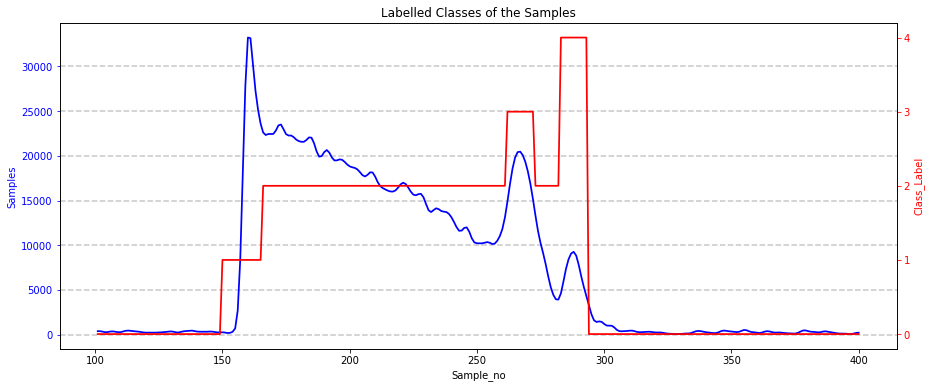

In [19]:
import matplotlib.pyplot as plt

def plot_data_with_class_labels(df):
    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(15, 6))

    # Plot Samples on primary y-axis
    ax1.plot(df['Sample_no'], df['Samples'], color='b', linewidth=1.75)
    ax1.set_xlabel('Sample_no')
    ax1.set_ylabel('Samples', color='b')
    ax1.tick_params('y', colors='b')

    # Create secondary y-axis for Class_Label
    ax2 = ax1.twinx()
    ax2.plot(df['Sample_no'], df['Class_Label'], color='r', linewidth=1.75)
    ax2.set_ylabel('Class_Label', color='r')
    ax2.tick_params('y', colors='r')
    ax2.set_yticks(range(int(df['Class_Label'].min()), int(df['Class_Label'].max()) + 1))

    # Remove grid from y-axis
    ax1.grid(axis='y', linestyle='--', linewidth=1.5, alpha=0.7)
    ax2.grid(False)

    plt.title('Labelled Classes of the Samples')
    plt.show()

# Iterate over each file's table data and plot the data with class labels
for file_name, df in table_data.items():
    print(f"Plotting data with class labels for {file_name}:")
    plot_data_with_class_labels(df)
    print()  # a blank line for separation


In [20]:
print(table_data)

{'waveform_303371215_085609_only.txt':      Sample_no  Samples  Class_Label
0          101      392            0
1          102      391            0
2          103      329            0
3          104      276            0
4          105      299            0
..         ...      ...          ...
295        396       79            0
296        397       78            0
297        398      124            0
298        399      196            0
299        400      223            0

[300 rows x 3 columns]}


In [21]:
import os
import re
import pandas as pd

def process_files_in_folder(folder_path, table_data):
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return
    
    # List all files in the folder
    files = os.listdir(folder_path)
    
    if not files:
        print(f"No files found in '{folder_path}'.")
        return
    
    print(f"Found {len(files)} files in '{folder_path}': {files}")  # Debugging statement
    
    file_count = 0
    
    for file_name in files:
        print(f"Reading file: {file_name}")  # Debugging statement
        file_path = os.path.join(folder_path, file_name)
        
        if os.path.isfile(file_path):
            # Initialize variables to store extracted values
            sample_length = None
            point = None
            x_cor, y_cor, z_cor = None, None, None  # Initialize variables for coordinates
            
            # Regular expression pattern to match floating-point numbers
            pattern = r"[-+]?\d*\.\d+|\d+"
            
            try:
                with open(file_path, 'r') as file:
                    file_contents = file.readlines()
                    
                    print(f"File contents length: {len(file_contents)}")  # Debugging statement
                    
                    # Extract coordinates (x, y, z) from the first line (Point)
                    if len(file_contents) >= 1:
                        point_match = re.findall(pattern, file_contents[0])
                        if len(point_match) >= 3:
                            x_cor = float(point_match[0])
                            y_cor = float(point_match[1])
                            z_cor = float(point_match[2])
                        print(f"Coordinates extracted: x={x_cor}, y={y_cor}, z={z_cor}")  # Debugging statement
                    
                    # Check if the file has at least 7 lines for sample length and point
                    if len(file_contents) >= 7:
                        sample_length_match = re.findall(pattern, file_contents[5])
                        point_match = re.findall(pattern, file_contents[6])
                        
                        # Convert the matched values to floats
                        if sample_length_match:
                            sample_length = float(sample_length_match[0])
                        if point_match:
                            point = float(point_match[0])
                        print(f"Sample Length: {sample_length}, Point: {point}")  # Debugging statement
                            
                        # Check if the file exists in table_data
                        if file_name in table_data:
                            df = table_data[file_name]
                            print(f"Updating DataFrame for {file_name}")  # Debugging statement
                            
                            # Update DataFrame with extracted values
                            df['x_cor'] = x_cor
                            df['y_cor'] = y_cor
                            df['z_cor'] = z_cor
                            df['Sample_Length'] = sample_length
                            df['Point'] = point
                            df['Returning_Point'] = int(point / sample_length) if sample_length else None
                            
                            file_count += 1
                            print(f"Processed file: {file_name}")
                        else:
                            print(f"File {file_name} not found in table_data. Available keys: {list(table_data.keys())}")  # Debugging statement
            
            except Exception as e:
                print(f"Error processing '{file_name}': {e}")
        else:
            print(f"'{file_name}' is not a file.")
    
    print(f"Processed {file_count} files.")

    folder_path = 'Text Files/'
process_files_in_folder(folder_path, table_data)


Found 1 files in 'Text Files/': ['waveform_303371215_085609_only.txt']
Reading file: waveform_303371215_085609_only.txt
File contents length: 971
Coordinates extracted: x=303835.36, y=6558110.769, z=39.179
Sample Length: 0.05996, Point: 15.95346
Updating DataFrame for waveform_303371215_085609_only.txt
Processed file: waveform_303371215_085609_only.txt
Processed 1 files.


In [22]:
print(table_data)

{'waveform_303371215_085609_only.txt':      Sample_no  Samples  Class_Label      x_cor        y_cor   z_cor  \
0          101      392            0  303835.36  6558110.769  39.179   
1          102      391            0  303835.36  6558110.769  39.179   
2          103      329            0  303835.36  6558110.769  39.179   
3          104      276            0  303835.36  6558110.769  39.179   
4          105      299            0  303835.36  6558110.769  39.179   
..         ...      ...          ...        ...          ...     ...   
295        396       79            0  303835.36  6558110.769  39.179   
296        397       78            0  303835.36  6558110.769  39.179   
297        398      124            0  303835.36  6558110.769  39.179   
298        399      196            0  303835.36  6558110.769  39.179   
299        400      223            0  303835.36  6558110.769  39.179   

     Sample_Length     Point  Returning_Point  
0          0.05996  15.95346              266  


In [23]:
import pandas as pd

def assign_final_classes(table_data):
    
    for file_name, df in table_data.items():
        returning_point = df['Returning_Point'].iloc[0]  
        
        # Find the Sample_no corresponding to the Returning_Point
        sample_no_with_point = df.loc[df['Sample_no'] == returning_point, 'Sample_no'].values
        
        if len(sample_no_with_point) > 0:
            # Get the corresponding Class_Label for the Sample_no
            final_class = df.loc[df['Sample_no'] == sample_no_with_point[0], 'Class_Label'].iloc[0]
            
            # Assign Final_Class to the DataFrame
            df['Final_Class'] = final_class
        else:
            # If no corresponding Sample_no found, assign NaN or handle accordingly
            df['Final_Class'] = None
    
    print("Final classes assigned successfully.")

def print_final_table(table_data):
    # Print the final table for each file
    for file_name, df in table_data.items():
        print(f"File: {file_name}")
        print(df)  
        print()  


assign_final_classes(table_data)

#the final table with the assigned final classes
print_final_table(table_data)


Final classes assigned successfully.
File: waveform_303371215_085609_only.txt
     Sample_no  Samples  Class_Label      x_cor        y_cor   z_cor  \
0          101      392            0  303835.36  6558110.769  39.179   
1          102      391            0  303835.36  6558110.769  39.179   
2          103      329            0  303835.36  6558110.769  39.179   
3          104      276            0  303835.36  6558110.769  39.179   
4          105      299            0  303835.36  6558110.769  39.179   
..         ...      ...          ...        ...          ...     ...   
295        396       79            0  303835.36  6558110.769  39.179   
296        397       78            0  303835.36  6558110.769  39.179   
297        398      124            0  303835.36  6558110.769  39.179   
298        399      196            0  303835.36  6558110.769  39.179   
299        400      223            0  303835.36  6558110.769  39.179   

     Sample_Length     Point  Returning_Point  Final_Clas

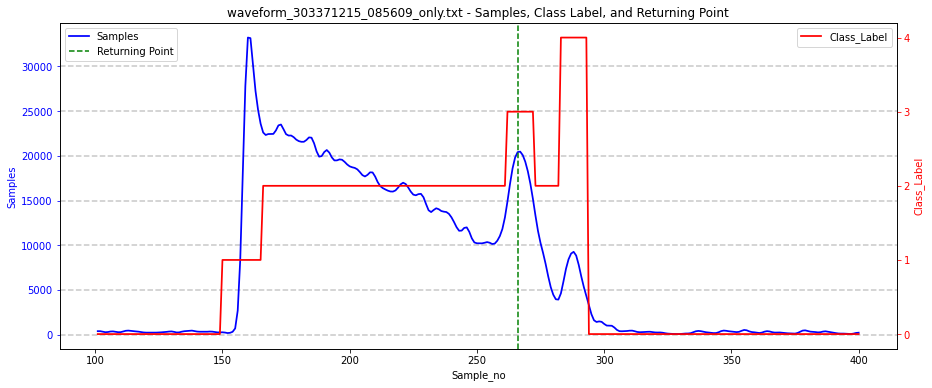

In [24]:
import matplotlib.pyplot as plt

def plot_final_data(df, file_name):
    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(15, 6))
    
    # Plot Samples on primary y-axis
    ax1.plot(df['Sample_no'], df['Samples'], color='b', linewidth=1.75, label='Samples')
    ax1.set_xlabel('Sample_no')
    ax1.set_ylabel('Samples', color='b')
    ax1.tick_params('y', colors='b')

    # Create secondary y-axis for Class_Label
    ax2 = ax1.twinx()
    ax2.plot(df['Sample_no'], df['Class_Label'], color='r', linewidth=1.75, label='Class_Label')
    ax2.set_ylabel('Class_Label', color='r')
    ax2.tick_params('y', colors='r')
    ax2.set_yticks(range(int(df['Class_Label'].min()), int(df['Class_Label'].max()) + 1))

    # Mark the Returning Point
    returning_point = df['Returning_Point'].iloc[0]  # Returning_Point is the same for all lines in the file
    ax1.axvline(x=returning_point, color='g', linestyle='--', linewidth=1.5, label='Returning Point')
    
    # Add legends to the plot
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    ax1.grid(axis='y', linestyle='--', linewidth=1.5, alpha=0.7)
    ax2.grid(False)
    
   
    plt.title(f'{file_name} - Samples, Class Label, and Returning Point')

    # Display the plot
    plt.show()

def plot_all_final_data(table_data):
    # Iterate over each file's data and plot the final data
    for file_name, df in table_data.items():
        plot_final_data(df, file_name)


plot_all_final_data(table_data)


In [26]:
# import os
from collections import defaultdict

def save_dataframes_as_csv(table_data, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    
    # Dictionary to store file paths grouped by class label
    class_file_paths = defaultdict(list)
    
    for file_name, df in table_data.items():
        # Extract Final_Class value
        final_class = df['Final_Class'].iloc[0]
        
        # Create new file name using the original file name and the final class label
        new_file_name = f"class_label_{final_class}_{file_name.split('.')[0]}.csv"
        output_path = os.path.join(output_folder, new_file_name)
        
        # Save the DataFrame as a CSV file with the new name
        df.to_csv(output_path, index=False)
        
        # Store the file path in the dictionary under the corresponding class label
        class_file_paths[final_class].append(output_path)
    
    # Print the saved file paths sorted by class label
    for class_label in sorted(class_file_paths.keys()):
        print(f"Class_label_{class_label}:")
        for path in class_file_paths[class_label]:
            print(f"Saved: {path}")
        print()  # Blank line for separation between class labels

# Save each DataFrame as a CSV with the new naming convention
output_folder = 'Processed_final_class/'
save_dataframes_as_csv(table_data, output_folder)


Class_label_3:
Saved: Processed_final_class/class_label_3_waveform_303371215_085609_only.csv

